<div style="border: 2px solid #FFA500; padding: 10px; border-radius: 5px; background-color: #FFFACD; color: black; text-align: center;">
  <h1 style="margin: 0;">Rice Husk Example 🌾</h1>
</div>

This example is based on the following publication: [Kätelhön et al. (2016)](https://doi.org/10.1021/acs.est.6b04270). The original example used for introducing the TCM deals with a simultaneous technology 🔨 and regional 🌐 choice problem. It can also be solved with PULPO. The superstructure can be seen below:

<div style="text-align: center;">
    <img src="figures/system_boundaries_rice-superstructure_neutral.svg" alt="System Boundaries of Rice Superstructure (Dark Theme)" width="400">
</div>

#### What do we want to achieve?

In this demonstration, we want to understand the choices in the system, when optimizing it for various impact categories, subject to various constraints. The first outcome is the following:

<div style="text-align: center;">
    <img src="figures/result_1.png" alt="System Boundaries of Rice Superstructure (Dark Theme)" width="400">
</div>

This plot reveals the total minimum GWP, as well as the optimal technology and regional mixes as a function of the final demand, subject to availability constraints.

<div style="text-align: center;">
    <img src="figures/result_2.png" alt="System Boundaries of Rice Superstructure (Dark Theme)" width="300">
</div>

This plot reveals the trade-off between minimizing the GWP and the Cost.

#### Problem Formulation

The original problem formulation deals with an economic objective function, using factor constraints. With PULPO, the intention is to solve LCO problems with environmental objectives, but a function for economic factors could be considered for implementation as well, if data availability allows so. 

Hence, the adapted problem formulation can be stated as follows:

**Goal and Scope**: Find the optimal system configuration, minimizing the global warming potential. First, in an unconstrained system, then a constrained system.

- **Functional Unit** 📦: For demonstration purpose, a final demand of 1 Mt of processed rice is specified. This value will be subject to a sensitivity analysis. 
- **Objective Function** 🎯: Global warming potential (GWP). Secondary objective: Economic impact.
- **Possible Choices** 🔄: 
	- **Regional** 🌐: (Rice husk collection 1 / Rice husk collection 2 / **...** / Rice husk collection 5)
	- **Technology** 🔨: (Rice husk boiler / Natural gas boiler / Wood pellet boiler)
- **Additional Constraints** ⚙️: None (*for now*)

##### **<u>Technosphere Matrix A</u>**
In the Technosphere, new choices are added in a **bottom-up** fashion, extending the original square matrix:


$$
\scriptsize
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
 & \text{Rice} & \text{Rice} & \text{Natural gas} & \text{natural} & \text{Power} & \text{Transportation} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Wood pellet}} & \textcolor{darkorange}{\text{Burning of}} & \textcolor{orange}{\text{Rice husk}} & \textcolor{orange}{\text{Wood pellet}} \\
 & \text{factory} & \text{farming} & \text{boiler} & \text{gas supply} & \text{plant} & \text{by truck} & \textcolor{darkorange}{\text{collection 1}} & \textcolor{darkorange}{\text{collection 2}} & \textcolor{darkorange}{\text{collection 3}} & \textcolor{darkorange}{\text{collection 4}} & \textcolor{darkorange}{\text{collection 5}} & \textcolor{darkorange}{\text{supply}} & \textcolor{darkorange}{\text{rice husk}} & \textcolor{orange}{\text{boiler}} & \textcolor{orange}{\text{boiler}} \\
\hline
\text{Processed rice (in Mt)} & 1 & 0 & 0 & 0 & 0 & 0 & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{PeachPuff}{0} & \textcolor{PeachPuff}{0} \\
\hline
\text{Unprocessed rice (in Mt)} & -1.15 & 1 & 0 & 0 & 0 & 0 & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{PeachPuff}{0} & \textcolor{PeachPuff}{0} \\
\hline
\text{Thermal energy (in TWh)} & -2.2 & 0 & \cellcolor{orange}\textcolor{white}{1} & 0 & 0 & 0 & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \cellcolor{orange}\textcolor{white}{1} & \cellcolor{orange}\textcolor{white}{1} \\
\hline
\text{Natural gas (in TWh)} & 0 & 0 & -1.11 & 1 & 0 & 0 & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{PeachPuff}{0} & \textcolor{PeachPuff}{0} \\
\hline
\text{Electricity (in TWh)} & -0.08 & 0 & 0 & 0 & 1 & 0 & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{darkorange}{-0.02} & \textcolor{LightSalmon}{0} & \textcolor{PeachPuff}{0} & \textcolor{PeachPuff}{0} \\
\hline
\text{Transportation (in Gt*km)} & -0.35 & 0 & 0 & 0 & 0 & 1 & \textcolor{darkorange}{-0.12} & \textcolor{darkorange}{-0.24} & \textcolor{darkorange}{-0.36} & \textcolor{darkorange}{-0.48} & \textcolor{darkorange}{-0.6} & \textcolor{darkorange}{-0.1} & \textcolor{LightSalmon}{0} & \textcolor{PeachPuff}{0} & \textcolor{PeachPuff}{0} \\
\hline
\textcolor{DodgerBlue}{\text{Rice husk at factory (in Mt)}} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \cellcolor{MediumOrchid}\textcolor{white}{1} & \cellcolor{MediumOrchid}\textcolor{white}{1} & \textcolor{MediumOrchid}{1} & \textcolor{MediumOrchid}{1} & \cellcolor{MediumOrchid}\textcolor{white}{1} & \textcolor{Thistle}{0} & \textcolor{Thistle}{0} & \textcolor{MediumOrchid}{-0.23} & \textcolor{Thistle}{0} \\
\hline
\textcolor{DodgerBlue}{\text{Rice husk at farm (in Mt)}} & \textcolor{lightblue}{0} & \textcolor{DodgerBlue}{0.6} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{MediumOrchid}{-1} & \textcolor{MediumOrchid}{-1} & \textcolor{MediumOrchid}{-1} & \textcolor{MediumOrchid}{-1} & \textcolor{MediumOrchid}{-1} & \textcolor{Thistle}{0} & \textcolor{MediumOrchid}{-1} & \textcolor{Thistle}{0} & \textcolor{Thistle}{0} \\
\hline
\textcolor{DodgerBlue}{\text{Wood pellets (in Mt)}} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{lightblue}{0} & \textcolor{Thistle}{0} & \textcolor{Thistle}{0} & \textcolor{Thistle}{0} & \textcolor{Thistle}{0} & \textcolor{Thistle}{0} & \textcolor{MediumOrchid}{1} & \textcolor{Thistle}{0} & \textcolor{Thistle}{0} & \textcolor{MediumOrchid}{-0.25} \\
\hline
\end{array}
$$

##### <u>Biosphere Matrix B</u>
In the Biosphere, the corresponding elementary flows need to be added:

$$
\scriptsize
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
 & \text{Rice} & \text{Rice} & \text{Natural gas} & \text{natural} & \text{Power} & \text{Transportation} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Rice husk}} & \textcolor{darkorange}{\text{Wood pellet}} & \textcolor{darkorange}{\text{Burning of}} & \textcolor{orange}{\text{Rice husk}} & \textcolor{orange}{\text{Wood pellet}} \\
 & \text{factory} & \text{farming} & \text{boiler} & \text{gas supply} & \text{plant} & \text{by truck} & \textcolor{darkorange}{\text{collection 1}} & \textcolor{darkorange}{\text{collection 2}} & \textcolor{darkorange}{\text{collection 3}} & \textcolor{darkorange}{\text{collection 4}} & \textcolor{darkorange}{\text{collection 5}} & \textcolor{darkorange}{\text{supply}} & \textcolor{darkorange}{\text{rice husk}} & \textcolor{orange}{\text{boiler}} & \textcolor{orange}{\text{boiler}} \\
\hline
\text{CO2 (in Mt)} & 0 & 6.14 \times 10^{-1} & 2.27 \times 10^{-1} & 3.21 \times 10^{-2} & 1.10 \times 10^{0} & 5.76 \times 10^{-2} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{darkorange}{1.50 \times 10^{-1}} & \textcolor{LightSalmon}{0} & \textcolor{PeachPuff}{0} & \textcolor{PeachPuff}{0} \\
\hline
\text{CH4 (in Mt)} & 0 & 1.33 \times 10^{-3} & 1.47 \times 10^{-4} & 1.50 \times 10^{-3} & 9.15 \times 10^{-4} & 6.97 \times 10^{-5} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{LightSalmon}{0} & \textcolor{darkorange}{2.56 \times 10^{-4}} & \textcolor{LightSalmon}{0} & \textcolor{PeachPuff}{0} & \textcolor{PeachPuff}{0} \\
\hline
\textcolor{FireBrick}{\text{Economic flows (in million \$)}} & \textcolor{FireBrick}{50} & \textcolor{FireBrick}{360} & \textcolor{LightCoral}{0} & \textcolor{FireBrick}{13} & \textcolor{FireBrick}{65} & \textcolor{FireBrick}{170} & \textcolor{FireBrick}{45} & \textcolor{FireBrick}{36} & \textcolor{FireBrick}{29} & \textcolor{FireBrick}{23} & \textcolor{FireBrick}{18} & \textcolor{FireBrick}{72} & \textcolor{LightCoral}{0} & \textcolor{LightCoral}{0} & \textcolor{LightCoral}{0} \\ \hline
\end{array}
$$

The final row for $\textcolor{FireBrick}{\text{economic flows}}$ is derived from the factor requirements matrix and the factor price vector from the original example. Only the cost for natural gas has been lowered slightly (16 --> 13), to enforce the economic competitiveness of the NG boiler. Although integrating economic flows into the biosphere matrix is unconventional, this approach will later be useful for demonstrating a multi-objective trade-off assessment, without the need to introduce additional elements to account for economic impacts.

##### <u>Characterization Factor Matrix Q</u>
The characterization factors are extended with a row for $\textcolor{FireBrick}{\text{Cost (in million \$)}}$:

$$
\scriptsize
\begin{array}{|c|c|c|c|}
\hline
 & \text{CO2} & \text{CH4} & \textcolor{FireBrick}{\text{Economic flows (in million \$)}}  \\
\hline
\text{GWP100 (in kg CO2e per kg)} & 1 & 25 & \textcolor{LightCoral}{0} \\
\hline
\textcolor{FireBrick}{\text{Cost (in million \$)}} & \textcolor{LightCoral}{0} & \textcolor{LightCoral}{0} & \textcolor{FireBrick}{1} \\
\hline
\end{array}
$$

_____
The whole system can be explored in [activity-browser](https://github.com/LCA-ActivityBrowser/activity-browser):
<div style="text-align: center;">
    <img src="figures/rice_husk_database.png" alt="System Boundaries of Rice Superstructure (Dark Theme)" width="600">
</div>
And the impact categories:
<div style="text-align: center;">
    <img src="figures/rice_impact_categories.png" alt="System Boundaries of Rice Superstructure (Dark Theme)" width="300">
</div>

<div style="border: 2px solid #FF6347; padding: 10px; border-radius: 5px; background-color: #FFE4E1; color: black; text-align: center;">
  <h2 style="margin: 0;">Resolution with PULPO 🐙</h2>
</div>

Import the necessary libraries

In [1]:
import os
import sys
from pulpo import pulpo

import numpy as np
np.NaN = np.nan
import pandas as pd
import copy

Set the project, database and method (**objective function**). In this example, the rice husk case study is used, which can be installed via a PULPO function (```install_rice_husk_db```).

In [2]:
pulpo.install_rice_husk_db()
project = "rice_husk_example" 
database = "rice_husk_example_db"
method = "('my project', 'climate change')"

Substitute with your working directory of choice. This directory will be used to store the results.

In [3]:
notebook_dir = os.path.dirname(os.getcwd())
directory = os.path.join(notebook_dir, 'data')

Create a **PulpoOptimizer** instance. This class is used to interact with the LCI database and solve the optimization problem. It is specified by the project, database, method and directory.

In [4]:
pulpo_worker = pulpo.PulpoOptimizer(project, database, method, directory)

Import LCI data. After initializing the PulpoOptimizer instance, the LCI data is imported from the database.

In [5]:
pulpo_worker.get_lci_data()

Specify the **functional unit**. In this case, the functional unit is 1 Mt of processed rice. PULPO implements a search function (```retrieve_activities```) to find the activities that match the specified reference products (alternatively: keys, activity name, region).

In [6]:
rice_factory = pulpo_worker.retrieve_activities(reference_products='Processed rice (in Mt)')

demand = {rice_factory[0]: 1}

Specify the **choices**. Here, the choices are regional 🌐 choices for rise husk collections, and technological ⛏ choices for boiler type selection.

The auxiliar choices are needed to resolve the issue that rice, when not used in the boiler must be burned instead. 

(*At this point, just accept. If you are curious about how this multi-functionality is technically adressed, refer to the paper, or reach out.*)

In [8]:
## Rise husk collection
rice_husk_activities = ["Rice husk collection 1",
              "Rice husk collection 2",
              "Rice husk collection 3",
              "Rice husk collection 4",
              "Rice husk collection 5",]
rice_husk_collections = pulpo_worker.retrieve_activities(activities=rice_husk_activities)

## Boilers
boiler_activities = ["Natural gas boiler",
                     "Wood pellet boiler",
                     "Rice husk boiler"]
boilers = pulpo_worker.retrieve_activities(activities=boiler_activities)

## Auxiliar
auxiliar_activities = ["Rice husk market",
                       "Burning of rice husk"]
auxiliar = pulpo_worker.retrieve_activities(activities=auxiliar_activities)

## Combine to create the choices dictionary
## For each kind of choice, assign a 'label' (e.g. 'boilers')
## To each possible choice, assign a process capacity. In the 'unconstrained' case, set this value very high (e.g. 1e10, but depends on the scale of the functional unit)
choices = {'Rice Husk (Mt)': {rice_husk_collections[0]: 1e10,
                              rice_husk_collections[1]: 1e10,
                              rice_husk_collections[2]: 1e10,
                              rice_husk_collections[3]: 1e10,
                              rice_husk_collections[4]: 1e10},
           'Thermal Energy (TWh)': {boilers[0]: 1e10,
                                    boilers[1]: 1e10,
                                    boilers[2]: 1e10},
           'Auxiliar': {auxiliar[0]: 1e10,
                        auxiliar[1]: 1e10}}

Instantiate and solve the optimization model

In [9]:
pulpo_worker.instantiate(choices=choices, demand=demand)
results = pulpo_worker.solve()

Creating Instance
Instance created


Save and summarize the results

In [11]:
pulpo_worker.save_results(choices=choices, demand=demand, name='rice_example_unconstrained.xlsx')
pulpo_worker.summarize_results(choices=choices, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Rice factory | Processed rice (in Mt) | GLO,1



These are the impacts contained in the objective:


,Key,Value
0,"('my project', 'climate change')",0.858541



The following choices were made: 
Rice Husk (Mt)


Rice Husk (Mt)                \
                                                     Activity      Capacity   
Activity 0  Rice husk collection 1 | Rice husk from region...  1.000000e+10   

                   
            Value  
Activity 0  0.506

Thermal Energy (TWh)


Thermal Energy (TWh)                \
                                                     Activity      Capacity   
Activity 0  Rice husk boiler | Thermal energy from husk bo...  1.000000e+10   

                  
           Value  
Activity 0   2.2

Auxiliar


Auxiliar                \
                                                     Activity      Capacity   
Activity 0  Burning of rice husk | Burned rice husk (in Mt...  1.000000e+10   

                   
            Value  
Activity 0  0.184

No additional constraints have been passed.


It can be seen that, in the unconstrained case minimizing the GWP, the optimal solution is to use the rice husk boiler and the rice husk collection 1. The minimum GWP is 0.859 Mt CO2-eq per Mt of processed rice.

So far, we said that the case is *unconstrained*. This means that we don't consider any relevant capacity constraints on any of the processes. Let's now move to the constrained case!

<div style="border: 2px solid #A9A9A9; padding: 10px; border-radius: 5px; background-color: #DCDCDC; color: black; text-align: center;">
  <h3 style="margin: 0;">Constrained Case 🔏</h3>
</div>

<div style="border: 2px solid #A8A8A8; padding: 8px; border-radius: 5px; background-color: #D3D3D3; color: black; text-align: center;">
  <h3 style="margin: 0;"> External Constraints due to Production Capacity and Availability</h3>
</div>

#### Choice Capacity Constraints ↔

Add a constraint to the rice husk collection of 0.1 Mt per zone

In [13]:
choices_constrained = copy.deepcopy(choices)
choices_constrained['Rice Husk (Mt)'] = {rice_husk_collections[0]: 0.1,
                                         rice_husk_collections[1]: 0.1,
                                         rice_husk_collections[2]: 0.1,
                                         rice_husk_collections[3]: 0.1,
                                         rice_husk_collections[4]: 0.1}

In [14]:
pulpo_worker.instantiate(choices=choices_constrained, demand=demand)
results = pulpo_worker.solve()

Creating Instance
Instance created


In [15]:
pulpo_worker.summarize_results(choices=choices_constrained, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Rice factory | Processed rice (in Mt) | GLO,1



These are the impacts contained in the objective:


,Key,Value
0,"('my project', 'climate change')",0.866639



The following choices were made: 
Rice Husk (Mt)


Rice Husk (Mt)               
                                                     Activity Capacity Value
Activity 0  Rice husk collection 5 | Rice husk from region...      0.1   0.1
Activity 1  Rice husk collection 4 | Rice husk from region...      0.1   0.1
Activity 2  Rice husk collection 2 | Rice husk from region...      0.1   0.1
Activity 3  Rice husk collection 3 | Rice husk from region...      0.1   0.1
Activity 4  Rice husk collection 1 | Rice husk from region...      0.1   0.1

Thermal Energy (TWh)


Thermal Energy (TWh)                \
                                                     Activity      Capacity   
Activity 0  Rice husk boiler | Thermal energy from husk bo...  1.000000e+10   
Activity 1  Wood pellet boiler | Thermal energy from wood ...  1.000000e+10   

                      
               Value  
Activity 0  2.173913  
Activity 1  0.026087

Auxiliar


Auxiliar                \
                                                     Activity      Capacity   
Activity 0  Burning of rice husk | Burned rice husk (in Mt...  1.000000e+10   

                  
           Value  
Activity 0  0.19

No additional constraints have been passed.


When constraints are specified on the availability of rice husk, the optimizer chooses to use all the available rice husk that can be transported from every zone. The remaining thermal energy is provided by the wood pellet boiler.

#### Lower Limits ⬇
The final amount of thermal energy supplied by the wood pellet boiler is very small (0.026 TWh) compared to the rice husk boiler (2.174 TWh). There is an option to enforce a lower limit on the production value of the wood pellet boiler. This can be done using the `lower_limit` parameter in the `instantiate` method:

In [16]:
lower_limit = {boilers[1]: 0.5}

In [17]:
pulpo_worker.instantiate(choices=choices_constrained, demand=demand, lower_limit=lower_limit)
results = pulpo_worker.solve()

Creating Instance
Instance created


Following the notion highlighted at the end of the previous section, let's investigate what happens if more thermal energy is required than the one that can be provided by the rice husk. This is done by adding another demand for the functional unit:

In [18]:
pulpo_worker.summarize_results(choices=choices_constrained, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Rice factory | Processed rice (in Mt) | GLO,1



These are the impacts contained in the objective:


,Key,Value
0,"('my project', 'climate change')",0.881352



The following choices were made: 
Rice Husk (Mt)


Rice Husk (Mt)                
                                                     Activity Capacity  Value
Activity 0  Rice husk collection 4 | Rice husk from region...      0.1  0.091
Activity 1  Rice husk collection 2 | Rice husk from region...      0.1  0.100
Activity 2  Rice husk collection 3 | Rice husk from region...      0.1  0.100
Activity 3  Rice husk collection 1 | Rice husk from region...      0.1  0.100

Thermal Energy (TWh)


Thermal Energy (TWh)                \
                                                     Activity      Capacity   
Activity 0  Rice husk boiler | Thermal energy from husk bo...  1.000000e+10   
Activity 1  Wood pellet boiler | Thermal energy from wood ...  1.000000e+10   

                  
           Value  
Activity 0   1.7  
Activity 1   0.5

Auxiliar


Auxiliar                \
                                                     Activity      Capacity   
Activity 0  Burning of rice husk | Burned rice husk (in Mt...  1.000000e+10   

                   
            Value  
Activity 0  0.299

No additional constraints have been passed.


It is observed that **0.5 TWh** are supplied by the wood pellet boiler. However, caution is advised when setting a lower limit, as it enforces the process operation regardless of the functional unit or objective. This may lead to infeasibilities if the process is forced to produce more than necessary.

##### Upper Limits ⬆

The same way that lower limits can be enforced, upper limits can be enforced as well. This can be done using the `upper_limit` parameter in the `instantiate` method. Let's see an example, where we limit the transportation process to 0.42 Gt*km (*This value has no rational meaning, and is just an example to demonstrate the upper limit functionality*):

In [19]:
# Retrieve the transport activity
transportation = pulpo_worker.retrieve_activities(activities=["Transportation by truck"])

In [20]:
upper_limit = {transportation[0]: 0.42}

In [21]:
pulpo_worker.instantiate(choices=choices_constrained, demand=demand, upper_limit=upper_limit)
results = pulpo_worker.solve()

Creating Instance
Instance created


In [22]:
pulpo_worker.summarize_results(choices=choices_constrained, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Rice factory | Processed rice (in Mt) | GLO,1



These are the impacts contained in the objective:


,Key,Value
0,"('my project', 'climate change')",0.895056



The following choices were made: 
Rice Husk (Mt)


Rice Husk (Mt)           \
                                                     Activity Capacity   
Activity 0  Rice husk collection 2 | Rice husk from region...      0.1   
Activity 1  Rice husk collection 3 | Rice husk from region...      0.1   
Activity 2  Rice husk collection 1 | Rice husk from region...      0.1   

                      
               Value  
Activity 0  0.100000  
Activity 1  0.094444  
Activity 2  0.100000

Thermal Energy (TWh)


Thermal Energy (TWh)                \
                                                     Activity      Capacity   
Activity 0  Rice husk boiler | Thermal energy from husk bo...  1.000000e+10   
Activity 1  Wood pellet boiler | Thermal energy from wood ...  1.000000e+10   

                      
               Value  
Activity 0  1.280193  
Activity 1  0.919807

Auxiliar


Auxiliar                \
                                                     Activity      Capacity   
Activity 0  Burning of rice husk | Burned rice husk (in Mt...  1.000000e+10   

                      
               Value  
Activity 0  0.395556

No additional constraints have been passed.


It can be seen that the optimizer chooses to source rice husk from zones 1-3 and the remaining demand for thermal heat is supplied by the wood pellet boiler.

<div style="border: 2px solid #FFB74D; padding: 8px; border-radius: 5px; background-color: #FFE0B2; color: black; text-align: center;">
  <h2 style="margin: 0;">Final Demand Variation 📦</h2>
</div>

In this section, we are varying the final demand and observe the consequence on the total GWP impact, as well as the technology and regional composition.

First, for illustrative purpose, we are introducing more tight constraints on the rice husk and wood pellet activities:

In [23]:
choices_constrained['Rice Husk (Mt)'] = {rice_husk_collections[0]: 0.03,
                                         rice_husk_collections[1]: 0.03,
                                         rice_husk_collections[2]: 0.03,
                                         rice_husk_collections[3]: 0.03,
                                         rice_husk_collections[4]: 0.03}

In [24]:
wood_pellet_supply = pulpo_worker.retrieve_activities(activities=["Wood pellet supply"])
upper_limit = {wood_pellet_supply[0]: 0.1}

The following code performs a loop over various demand values ranging from 0.05 Mt to 1.00 Mt of rice.

> **Disclaimer**:  
> The syntax used here to access the internal variables of the optimization problem is not as intuitive and requires profound knowledge of the data structures of PULPO (e.g., the process map). We are working on simplifying this, to make it easier for users to access these variables outside the "summarize" and "save" functions.

In [25]:
# List of final demand values
final_demand_values = [i * 0.05 for i in range(1, 21)]

# Define the entries to be analysed
process_map = pulpo_worker.lci_data['process_map']
boilers = ['Natural gas boiler', 'Wood pellet boiler', 'Rice husk boiler']
zones = [f'Rice husk collection {i}' for i in range(1, 6)]

# Mapping process IDs
boiler_ids = [process_map[('rice_husk_example_db', boiler)] for boiler in boilers]
zone_ids = [process_map[('rice_husk_example_db', zone)] for zone in zones]

# Initialize results dictionary
results_list = {
    'demand': [],
    'impact': [],
    'natural_gas_boiler': [],
    'wood_pellet_boiler': [],
    'rice_husk_boiler': [],
    **{f'rice_husk_zone_{i}': [] for i in range(1, 6)}
}

for demand_value in final_demand_values:
    # Set the demand for processed rice
    demand_dict = {rice_factory[0]: demand_value}
    
    # Instantiate and solve the optimization model
    pulpo_worker.instantiate(choices=choices_constrained, demand=demand_dict, upper_limit=upper_limit)
    results = pulpo_worker.solve()
    print()
    
    # Append the results to the list
    results_list['demand'].append(demand_value)
    results_list['impact'].append(pulpo_worker.instance.OBJ())

    # Normalize and append boiler results
    total_boilers = sum(pulpo_worker.instance.scaling_vector[i].value for i in boiler_ids)
    for boiler, boiler_id in zip(boilers, boiler_ids):
        results_list[boiler.lower().replace(' ', '_')].append(
            pulpo_worker.instance.scaling_vector[boiler_id].value / total_boilers
        )

    # Normalize and append zone results
    total_zones = sum(pulpo_worker.instance.scaling_vector[i].value for i in zone_ids)
    for i, zone_id in enumerate(zone_ids, start=1):
        results_list[f'rice_husk_zone_{i}'].append(
            pulpo_worker.instance.scaling_vector[zone_id].value / total_zones
        )

# Convert the results_list dictionary to a pandas DataFrame
results_df = pd.DataFrame(results_list)

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created

Creating Instance
Instance created



Plot the results in a bar chart. While this approach works, the visualization of results could benefit from standardized plots, which we are planning to implement. Currently, users need to manually extract the relevant values and create the visualizations that best meet their needs.

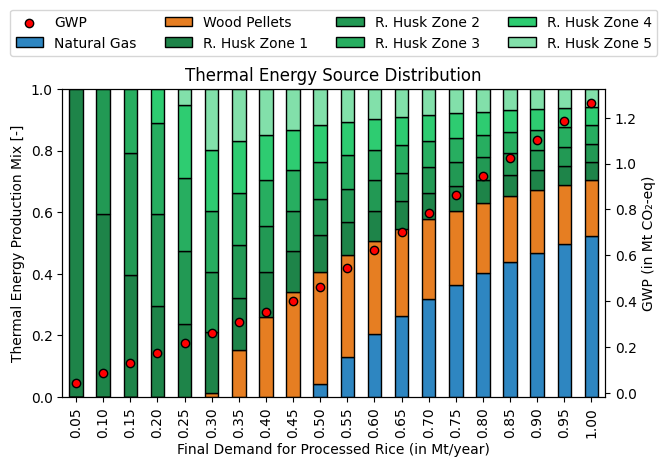

In [26]:
import plot_functions
plot_functions.plot_demand(results_df)

<div style="border: 2px solid #00CED1; padding: 10px; border-radius: 5px; background-color: #E0FFFF; color: black;"> 
  🛠️ This could be implemented as a standard function in <strong>PULPO</strong>.
</div>

<div style="border: 2px solid #FF7043; padding: 8px; border-radius: 5px; background-color: #FFCCBC; color: black; text-align: center;">
  <h2 style="margin: 0;">Multi-Objective / Trade-off 🎯</h2>
</div>

In this section, we will first optimize the system using the $\textcolor{FireBrick}{\text{economic flows}}$ as objective, and then analyse the trade-off. To that end, we will create a new pulpo_worker, which imports both impact categories. For now, we specify a weight of 0 for the environmental and a weight of 1 for the economic objective:

In [27]:
methods = {"('my project', 'climate change')": 0, "('my project', 'economic flow')": 1}

In [28]:
pulpo_worker_multi = pulpo.PulpoOptimizer(project, database, methods, directory)
pulpo_worker_multi.get_lci_data()

With the worker created, we can proceed to instantiate and solve the problem, now with the economic objective function:

In [29]:
pulpo_worker_multi.instantiate(choices=choices_constrained, demand=demand, upper_limit=upper_limit)
results = pulpo_worker_multi.solve()

Creating Instance
Instance created


In [30]:
pulpo_worker_multi.summarize_results(choices=choices, demand=demand, zeroes=True)

The following demand / functional unit has been specified: 


,Demand
Rice factory | Processed rice (in Mt) | GLO,1



These are the impacts contained in the objective:


,Key,Value
0,"('my project', 'economic flow')",560.159992



The following impacts were calculated: 


,Key,Value
1,"('my project', 'economic flow')",560.159992
0,"('my project', 'climate change')",1.603619



The following choices were made: 
Rice Husk (Mt)


Empty DataFrame
Columns: [(Rice Husk (Mt), Activity), (Rice Husk (Mt), Capacity), (Rice Husk (Mt), Value)]
Index: []

Thermal Energy (TWh)


Thermal Energy (TWh)                \
                                                     Activity      Capacity   
Activity 0  Natural gas boiler | Thermal energy from natur...  1.000000e+10   

                  
           Value  
Activity 0   2.2

Auxiliar


Auxiliar                \
                                                     Activity      Capacity   
Activity 0  Burning of rice husk | Burned rice husk (in Mt...  1.000000e+10   

                  
           Value  
Activity 0  0.69

No additional constraints have been passed.


As anticipated, the natural gas option minimizes costs (0.56 $/kg processed rice). However, this cost reduction leads to a significant increase in the climate change impact (1.20 → 1.60 kg CO2e/kg processed rice). Given these trade-offs, how does the Pareto front appear? For that purpose, we are going to use the epsilon-constrained method, constraining the environmental objective between the values corresponding to the environmental optimum and the economic optimum:

In [31]:
lower_impact = pulpo_worker.instance.impacts["('my project', 'climate change')"].value
upper_impact = pulpo_worker_multi.instance.impacts_calculated["('my project', 'climate change')"]
epsilon_list = np.linspace(lower_impact, upper_impact, num=10)

Indicator constraints can be specified in PULPO using the `upper_imp_limit` parameter of the instantiate function, as can be seen in the loop below:

In [32]:
# Initialize an empty list to store the Pareto front data
pareto_front = []

gw_category = "('my project', 'climate change')"
ef_category = "('my project', 'economic flow')"

for epsilon in epsilon_list:
    # Adjust the internal objective weights
    epsilon_constraint = {"('my project', 'climate change')": epsilon}
    pulpo_worker_multi.instantiate(choices=choices_constrained, demand=demand, upper_limit=upper_limit, upper_imp_limit=epsilon_constraint)
    results = pulpo_worker_multi.solve()

    # Calculate the impacts
    impacts = {x: pulpo_worker_multi.instance.impacts[x].value for x in pulpo_worker_multi.instance.impacts}
    
    # Save the impacts in the Pareto front list (cost divided by 1000)
    pareto_front.append((impacts[ef_category]/1000, impacts[gw_category]))
    
    # Print the impacts for each iteration
    print(f"Cost [$/kg processed rice]:{impacts[ef_category]/1000}")
    print(f"GWP [kg CO2-eq/kg processed rice]: {impacts[gw_category]}")
    print()

Creating Instance
Instance created
Cost [$/kg processed rice]:0.5660239046365155
GWP [kg CO2-eq/kg processed rice]: 1.2643985959378212

Creating Instance
Instance created
Cost [$/kg processed rice]:0.5645145348290376
GWP [kg CO2-eq/kg processed rice]: 1.3020897964632054

Creating Instance
Instance created
Cost [$/kg processed rice]:0.5633517258912104
GWP [kg CO2-eq/kg processed rice]: 1.3397809969885897

Creating Instance
Instance created
Cost [$/kg processed rice]:0.5625124201590841
GWP [kg CO2-eq/kg processed rice]: 1.3774721975139737

Creating Instance
Instance created
Cost [$/kg processed rice]:0.5619278710875342
GWP [kg CO2-eq/kg processed rice]: 1.4151633980393579

Creating Instance
Instance created
Cost [$/kg processed rice]:0.5614648803801943
GWP [kg CO2-eq/kg processed rice]: 1.452854598564742

Creating Instance
Instance created
Cost [$/kg processed rice]:0.5610018896728544
GWP [kg CO2-eq/kg processed rice]: 1.4905457990901263

Creating Instance
Instance created
Cost [$/kg pro

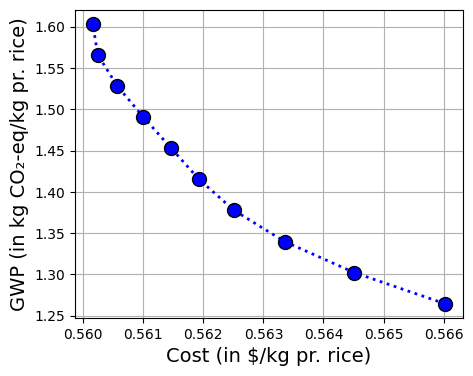

In [33]:
plot_functions.plot_pareto(pareto_front)

This type of (_constrained_) trade-off assessment highlights the inherent compromises involved in designing a production system with multiple criteria. In this example, the two extreme points (known as **anchor** points) demonstrate that a significant reduction in GWP (from 1.60 to 1.25 kg CO2-eq) can be achieved with only a slight increase in cost (from 0.560 to 0.566 \$). The Pareto front, defined by the 10 points shown, illustrates how balanced solutions can be realized.

<div style="border: 2px solid #00CED1; padding: 10px; border-radius: 5px; background-color: #E0FFFF; color: black;"> 
  🛠️ This could be implemented as a standard function in <strong>PULPO</strong>.
</div>

<div style="border: 2px solid #B0B0B0; padding: 8px; border-radius: 5px; background-color: #E0E0E0; color: black; text-align: center;">
  <h3 style="margin: 0;">Internal Constraint due to Multi-Functionality</h3>
</div>

Following the notion highlighted at the end of the previous section, let's investigate what happens if more thermal energy is required than the one that can be provided by the rice husk. This is done by adding another demand for the functional unit:

In [ ]:
demand_thermal = {rice_factory[0]: 1,
          'Thermal Energy (TWh)': 10}

In [ ]:
pulpo_worker.instantiate(choices=choices, demand=demand_thermal)
results = pulpo_worker.solve()

In [ ]:
pulpo_worker.summarize_results(choices=choices, demand=demand_thermal, zeroes=True)

As can be seen from the choices made by the optimizer, the rice husk boiler is used to its full capacity, conditioned by the demand for rice:

$$
1 \, \text{Mt processed rice} \times 1.15 \frac{\text{Mt unprocessed rice}}{\text{Mt processed rice}} \times 0.6 \frac{\text{Mt Rice husk}}{\text{Mt unprocessed rice}} = 0.69 \, \text{Mt Rice husk} 
$$

The rest of the thermal energy is provided by the wood pellet boiler.
